In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


In [13]:
emissiondata = pd.read_csv('CarbonEmission.csv')

#X=emissiondata[['Days','CO2Emission']].values
#y=emissiondata['Category'].values

print('tp1')
X=emissiondata[['Days','CO2Emission']].to_numpy()
y=emissiondata['Category'].to_numpy()
print('tp2')


h = 0.02
C = 1.0
print(X)


tp1
tp2
[[  1.   15. ]
 [  2.   17.4]
 [  3.   25.7]
 [  4.   30. ]
 [  5.   29.1]
 [  6.   30.4]
 [  7.   32.2]
 [  8.   33.2]
 [  9.   22.2]
 [ 10.   31.8]
 [ 11.   25.3]
 [ 12.   27.8]
 [ 13.   28.5]
 [ 14.   35.4]
 [ 15.   21.2]
 [ 16.   37.4]
 [ 17.   29.7]
 [ 18.   28.6]
 [ 19.   34.2]
 [ 20.   23.1]
 [ 21.   37.5]
 [ 22.   22.2]
 [ 23.   37.1]
 [ 24.   26.8]
 [ 25.   30.3]
 [ 26.   38.1]
 [ 27.   18.5]
 [ 28.   18.1]
 [ 29.   29.2]
 [ 30.   19.9]
 [ 31.   30.7]
 [ 32.   39.9]
 [ 33.   15.5]
 [ 34.   22.5]
 [ 35.   20.2]
 [ 36.   17.8]
 [ 37.   34.9]
 [ 38.   16.7]
 [ 39.   37.9]
 [ 40.   24.6]
 [ 41.   28.4]
 [ 42.   37.2]
 [ 43.   35. ]
 [ 44.   37.2]
 [ 45.   34.7]
 [ 46.   24.3]
 [ 47.   16.5]
 [ 48.   23.8]
 [ 49.   39.8]
 [ 50.   22.9]
 [ 51.   23.6]
 [ 52.   26.9]
 [ 53.   18.5]
 [ 54.   29.8]
 [ 55.   17.3]
 [ 56.   28.1]
 [ 57.   39. ]
 [ 58.   20.2]
 [ 59.   33.7]
 [ 60.   19.6]
 [ 61.   26.8]
 [ 62.   36.5]
 [ 63.   40. ]
 [ 64.   26.5]
 [ 65.   17.1]
 [ 66.   35.2]
 [

In [14]:
svc = svm.SVC(kernel='linear', C=C).fit(X,y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.4, C=1).fit(X,y)
poly_svc = svm.SVC(kernel='poly', degree=2, C=1).fit(X,y)
print('tp4')


#x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
#y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

# x_min = np.array(X[:,0].tolist(), dtype=float).min() - 1
# x_max = np.array(X[:,0].tolist(), dtype=float).max() + 1
# y_min = np.array(X[:,1].tolist(), dtype=float).min() - 1
# y_max = np.array(X[:,1].tolist(), dtype=float).max() + 1
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
print('tp5', x_min, x_max, y_min, y_max)


xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
print('tp6',xx,yy)

titles = ['SVC with linear kernel', 'SVC with RBF kernel', 'SVC with polynomial kernel']
print('tp7')

tp4
tp5 0.0 151.0 0 3
tp6 [[0.0000e+00 2.0000e-02 4.0000e-02 ... 1.5094e+02 1.5096e+02 1.5098e+02]
 [0.0000e+00 2.0000e-02 4.0000e-02 ... 1.5094e+02 1.5096e+02 1.5098e+02]
 [0.0000e+00 2.0000e-02 4.0000e-02 ... 1.5094e+02 1.5096e+02 1.5098e+02]
 ...
 [0.0000e+00 2.0000e-02 4.0000e-02 ... 1.5094e+02 1.5096e+02 1.5098e+02]
 [0.0000e+00 2.0000e-02 4.0000e-02 ... 1.5094e+02 1.5096e+02 1.5098e+02]
 [0.0000e+00 2.0000e-02 4.0000e-02 ... 1.5094e+02 1.5096e+02 1.5098e+02]] [[0.   0.   0.   ... 0.   0.   0.  ]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.04 0.04 0.04 ... 0.04 0.04 0.04]
 ...
 [2.94 2.94 2.94 ... 2.94 2.94 2.94]
 [2.96 2.96 2.96 ... 2.96 2.96 2.96]
 [2.98 2.98 2.98 ... 2.98 2.98 2.98]]
tp7


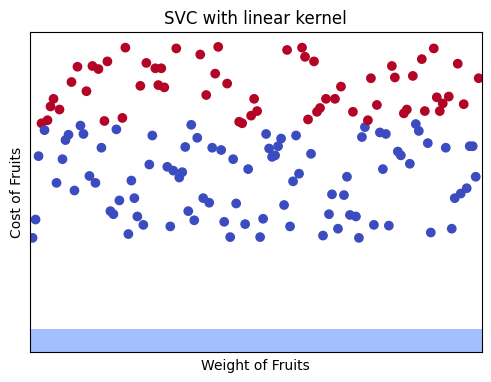

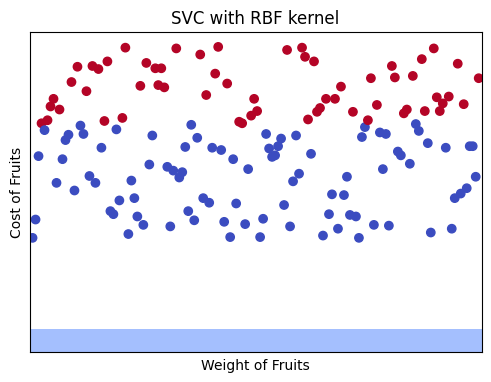

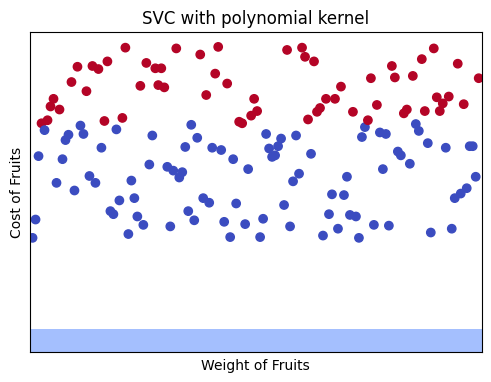

In [16]:
for i, clf in enumerate((svc, rbf_svc, poly_svc)):
   plt.figure(figsize = (14, 10))
   plt.subplot(2, 2, i+1)
   plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

   Z = Z.reshape(xx.shape)
   plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
   #plot also the traning points
   plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm)
   plt.xlabel('Weight of Fruits')
   plt.ylabel('Cost of Fruits')
   plt.xlim(xx.min(), xx.max())
   plt.xticks(())
   plt.yticks(())
   plt.title(titles[i])
plt.show()